In [85]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Attribute Information
#Passenger id- Unique Id of the passenger
#Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#Survived- Survived (0 = No; 1 = Yes)
#Name- Name of the passenger
#Sex- Sex of the passenger (Male, Female)
#Age- Age of the passenger
#Sibsp- Number of Siblings/Spouses Aboard
#Parch- Number of Parents/Children Aboard
#Ticket- Ticket Number
#Fare- Passenger Fare (British pound)
#Cabin- Cabin
#Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [86]:
df =pd.read_csv(r"C:\Users\bee\Desktop\Data set\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
df.shape

(891, 12)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
#Checking Duplicate value in dataframe
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 0


In [21]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
#drop columns with nan values
df=df.drop("Cabin",axis=1)

In [88]:
#drop columns with nan values
df=df.drop("Embarked",axis=1)

In [89]:
#drop irrelevant columns
df=df.drop("PassengerId",axis=1)

In [90]:
df# print dataframe to check if the irrelevant columns have been removed

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [91]:
#check for null values again
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [92]:
#Fill the null values for numerical column
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [93]:
#Verify if nan values have been filled for the age column
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

<Axes: >

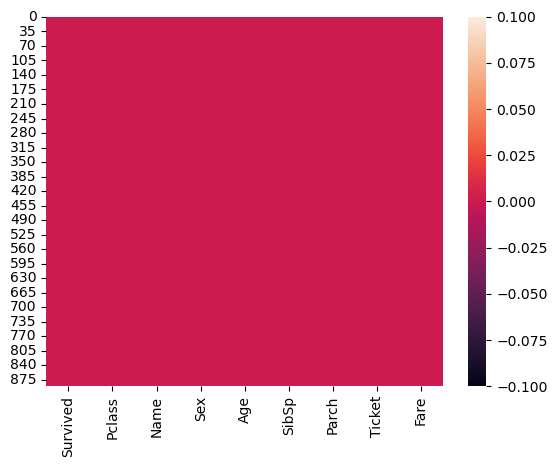

In [94]:
#checking null values using the heatmap(All null values have been removed)
sns.heatmap(df.isnull())

In [95]:
#Seperating numerical and categorical columns.Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
        print("categorical columns:",categorical_col)
        print("\n")

categorical columns: ['Name']


categorical columns: ['Name', 'Sex']


categorical columns: ['Name', 'Sex', 'Ticket']




In [96]:
#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="int64":
        numerical_col.append(i)
        print("numerical columns:",numerical_col)
       

numerical columns: ['Survived']
numerical columns: ['Survived', 'Pclass']
numerical columns: ['Survived', 'Pclass', 'SibSp']
numerical columns: ['Survived', 'Pclass', 'SibSp', 'Parch']


In [97]:
#checking number of unique values
df.nunique().to_frame("No. of Unique values")


,No. of Unique values
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [39]:
#checking the list of counts of target column.There are two categories present in the target column (Survived),0=No,1=Yes 
df["Survived"].unique()


array([0, 1], dtype=int64)

In [40]:
#checking unique values in target column.The result shows that this is a binary classification problem as it gives two possible outcomes.
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
#Statistical summary of numerical columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#From the statistical summary above the count values are the same therefore no missing values in the data
#In the fare,Parch coolumns mean is greater than median therefore the data is skewed to the right


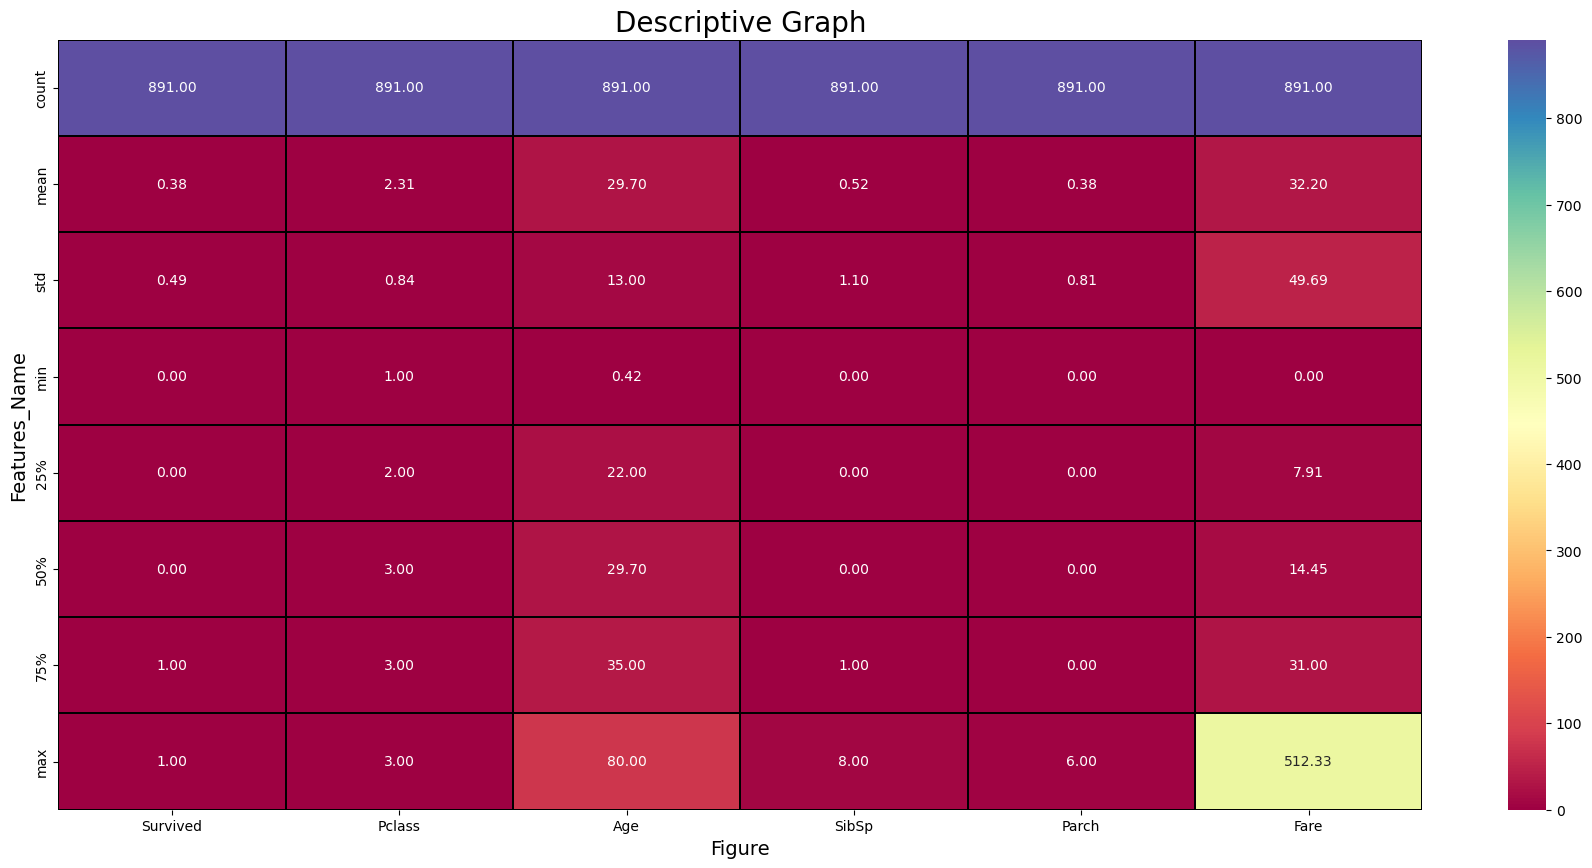

In [42]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

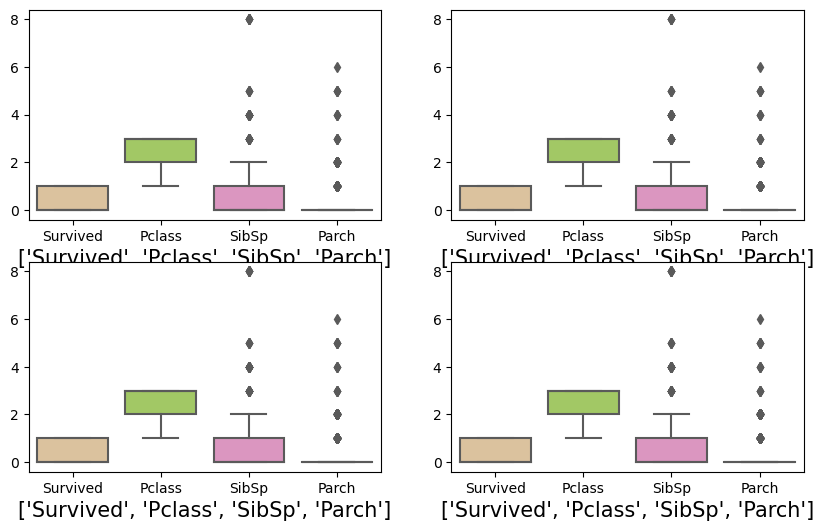

In [43]:
#Let's check outliers using boxplot(there are no outliers from continuous data,even though the SibSp and Parch columns show outliers,they do not affect the target variable)
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for column in numerical_col:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[numerical_col],palette ="Set2_r")
        plt.xlabel(numerical_col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.show()

In [44]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
from scipy.stats import zscore
out_features=df[['Pclass','SibSp','Parch']]
z=np.abs(zscore(out_features))
z

,Pclass,SibSp,Parch
0,0.827377,0.432793,0.473674
1,1.566107,0.432793,0.473674
2,0.827377,0.474545,0.473674
3,1.566107,0.432793,0.473674
4,0.827377,0.474545,0.473674
...,...,...,...
886,0.369365,0.474545,0.473674
887,1.566107,0.474545,0.473674
888,0.827377,0.432793,2.008933
889,1.566107,0.474545,0.473674


In [45]:
#threshold
np.where (z>3)

(array([ 13,  16,  25,  50,  59,  68,  71,  86, 119, 159, 164, 167, 171,
        180, 182, 201, 233, 261, 266, 278, 324, 360, 386, 437, 438, 480,
        541, 542, 567, 610, 638, 678, 683, 686, 736, 774, 787, 792, 813,
        824, 846, 850, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
        2], dtype=int64))

In [46]:
z.iloc[50,1]

3.1548090514635256

In [47]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(846, 10)

In [39]:
#shape of old and new dataframe
print("Old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Old Data Frame- 891
New Data Frame- 846


In [48]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage- 5.05050505050505


In [98]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,95.0,1.0,22.000000,1,0,517.0,1.935438,2.0
1,1,1,177.0,0.0,38.000000,1,0,588.0,4.146318,0.0
2,1,3,331.0,0.0,26.000000,0,0,661.0,1.993730,2.0
3,1,1,256.0,0.0,35.000000,1,0,49.0,3.758647,2.0
4,0,3,15.0,1.0,35.000000,0,0,467.0,2.004158,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,525.0,1.0,27.000000,0,0,101.0,2.351335,2.0
887,1,1,281.0,0.0,19.000000,0,0,14.0,3.107233,2.0
888,0,3,390.0,0.0,29.699118,1,2,667.0,2.862294,2.0
889,1,1,68.0,1.0,26.000000,0,0,8.0,3.107233,0.0


In [50]:
df=df1

In [51]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(676, 10)

In [52]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage- 20.094562647754138


In [ ]:
#We will choose the z score method because it is resulting in less data loss

In [53]:
df=df1

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 846, dtype: int64>


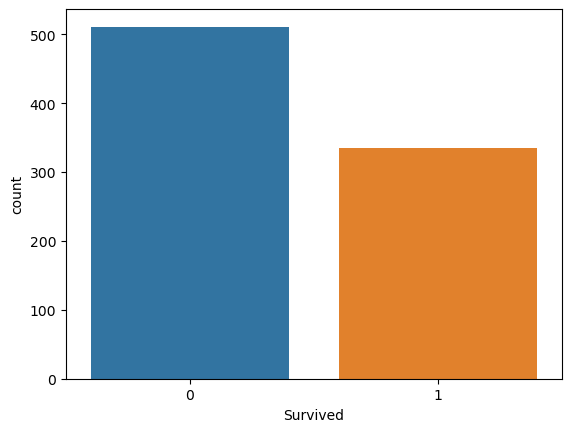

In [54]:
#Data visualization-Univariate analysis
#Visualize the number of Survived passengers
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts)

In [ ]:
#the bar graph above shows an imbalance in the data

male      553
female    293
Name: Sex, dtype: int64


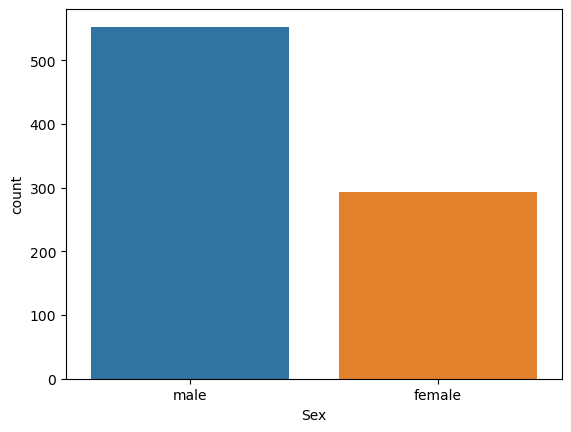

In [55]:
#Visualize the count of Sex(there were more male than female on board)
print(df['Sex'].value_counts())
ax=sns.countplot(x='Sex',data=df)
plt.show()

3    449
1    215
2    182
Name: Pclass, dtype: int64


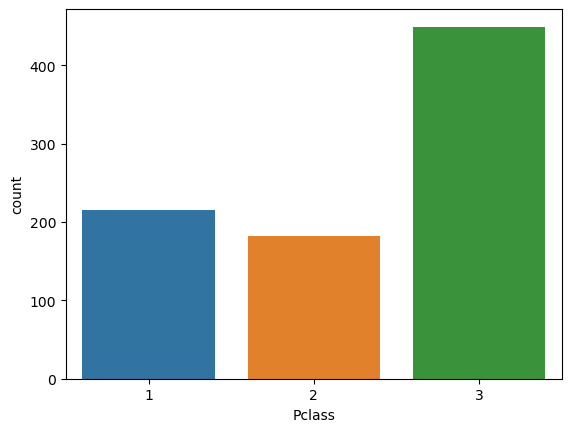

In [56]:
#Visualize the count of passenger class(most passengers travelled in the third class)
print(df['Pclass'].value_counts())
ax=sns.countplot(x='Pclass',data=df)
plt.show()

29.699118    170
24.000000     28
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
12.000000      1
70.500000      1
66.000000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


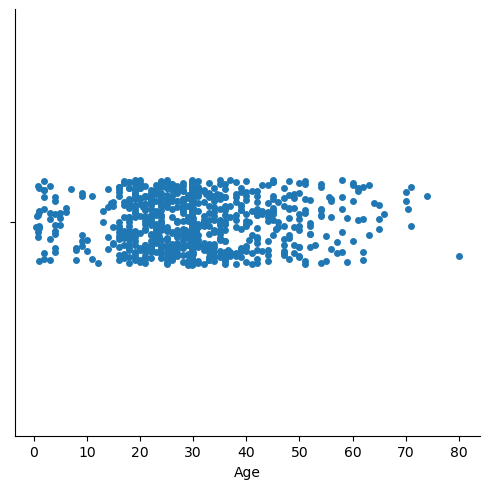

In [57]:
#Visualize the count of Age(most passengers were middle aged)
print(df['Age'].value_counts())
ax=sns.catplot(x='Age',data=df)
plt.show()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
14.0000     1
8.0292      1
8.8500      1
12.8750     1
10.5167     1
Name: Fare, Length: 242, dtype: int64


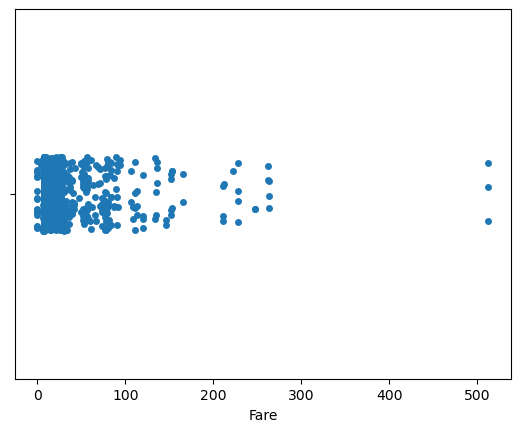

In [58]:
#Visualize the count of passengers and fare paid(it appears that most passengers paid the lowest fare )
print(df['Fare'].value_counts())
ax=sns.stripplot(x='Fare',data=df)
plt.show()

0    678
1    109
2     59
Name: Parch, dtype: int64


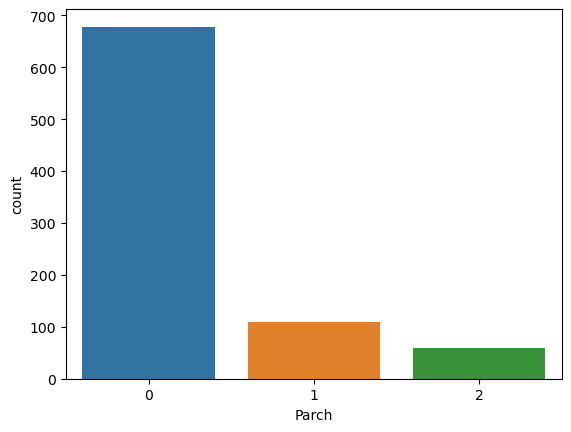

In [59]:
#Visualize the count of passengers and where they emabarked on the shipid(most passengers boarded at Southampton)
print(df['Parch'].value_counts())
ax=sns.countplot(x='Parch',data=df)
plt.show()

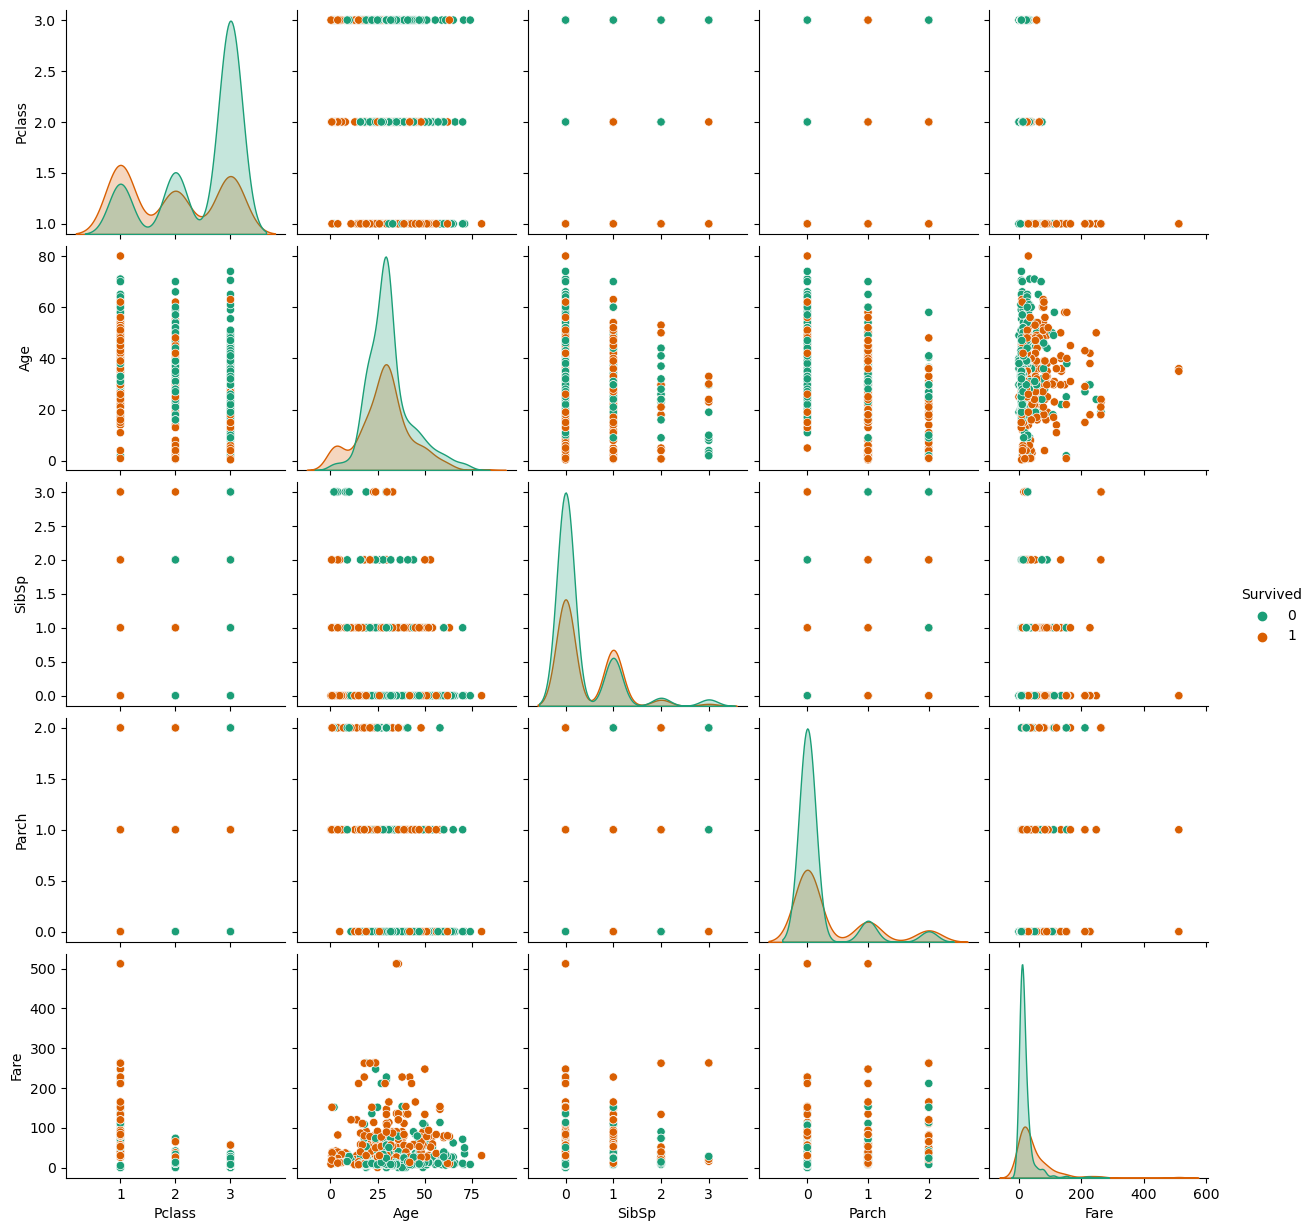

In [60]:
#Multivariate Analysis(the data shows some normal distribution when you check the diagonal plot)
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

In [61]:
#checking for skeweness
df.skew()

Survived    0.426139
Pclass     -0.558458
Age         0.516918
SibSp       2.018553
Parch       2.044444
Fare        4.803037
dtype: float64

In [62]:
df['Fare']=np.cbrt(df['Fare'])

In [63]:
df.skew()

Survived    0.426139
Pclass     -0.558458
Age         0.516918
SibSp       2.018553
Parch       2.044444
Fare        1.293656
dtype: float64

In [64]:
#removing skeweness by log transformation method
data = np.random.exponential(scale=10, size=1000)

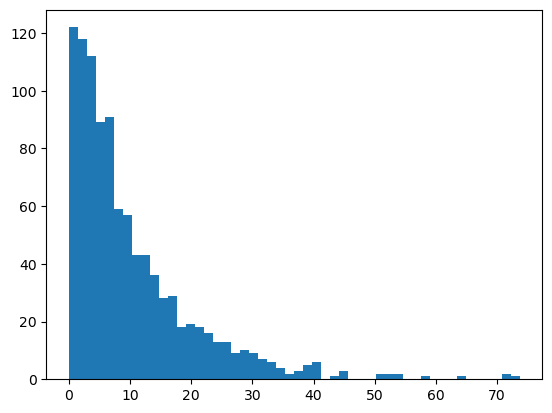

In [66]:
plt.hist(data, bins=50)

plt.show()

In [67]:
log_data = np.log(data)

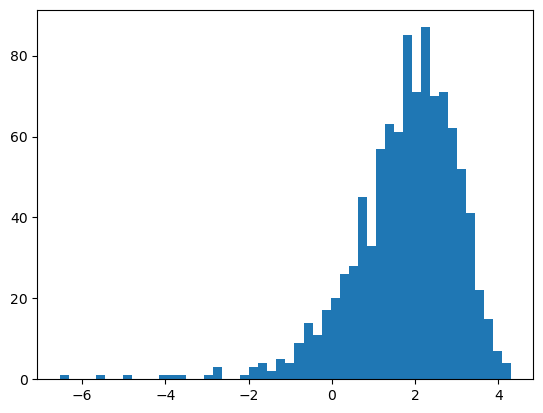

In [68]:
plt.hist(log_data, bins=50)

plt.show()

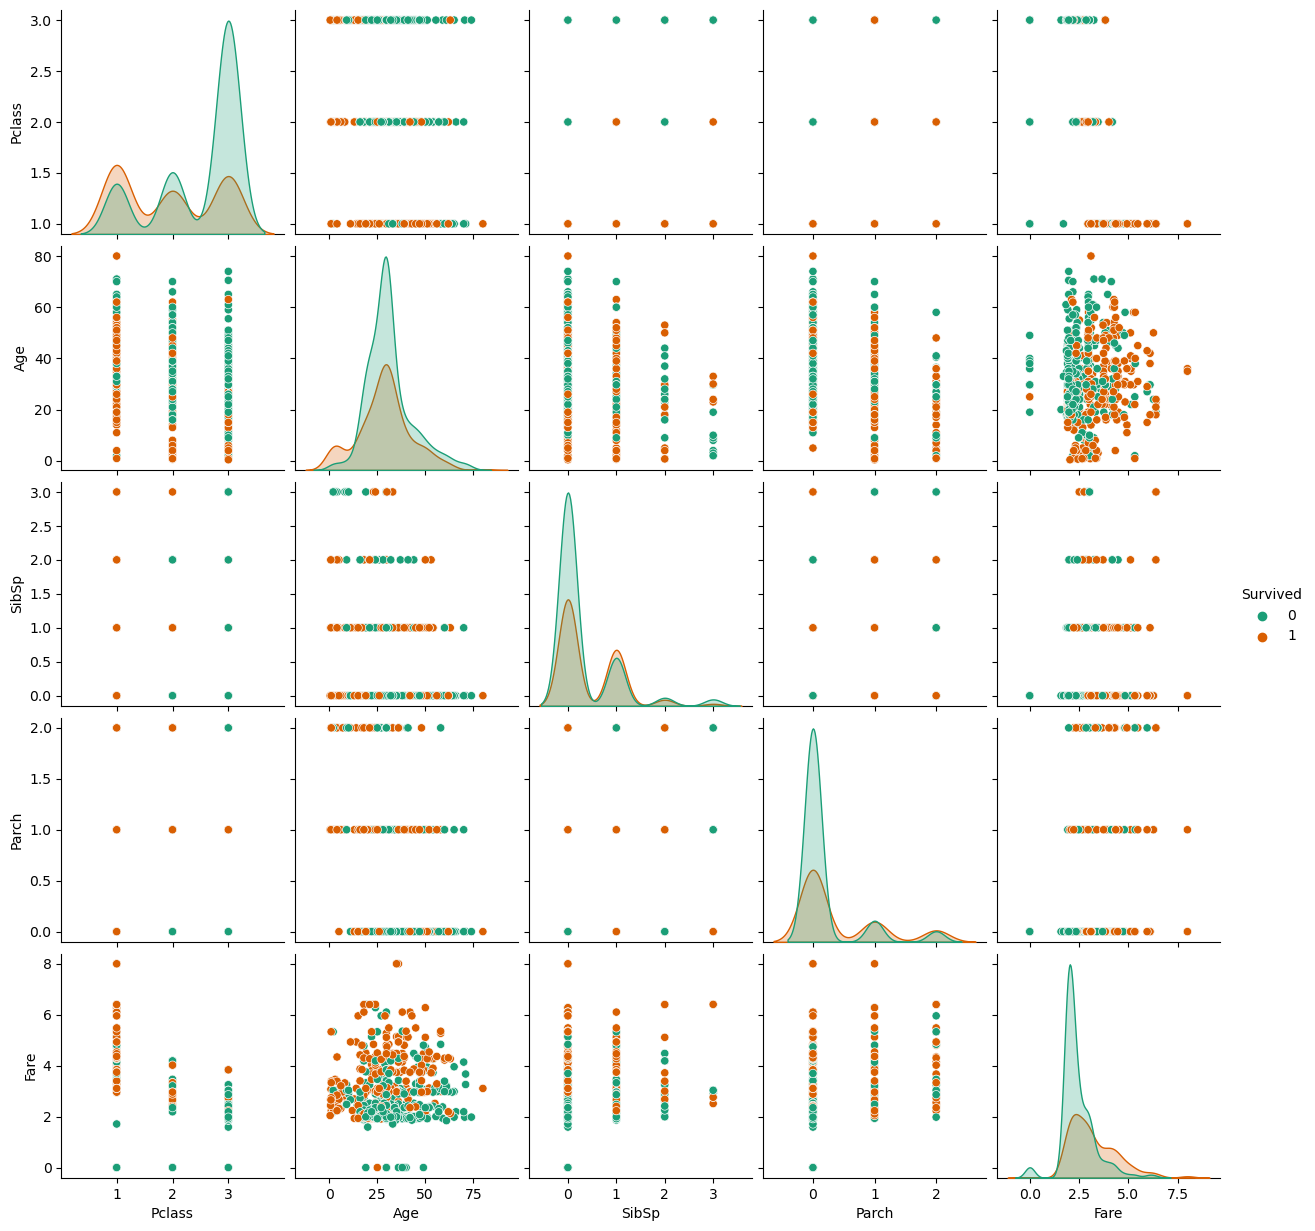

In [69]:
#After removing skeweness
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

In [111]:
#Encoding categorical columns using Ordinal encorder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500
1,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833
2,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250
3,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000
4,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000
887,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000
888,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500
889,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000


In [112]:
#check data after encoding 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    float64
 3   Sex       891 non-null    float64
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    float64
 8   Fare      891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


In [113]:
#checking the correlation between features and target
cor=df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000


<Axes: >

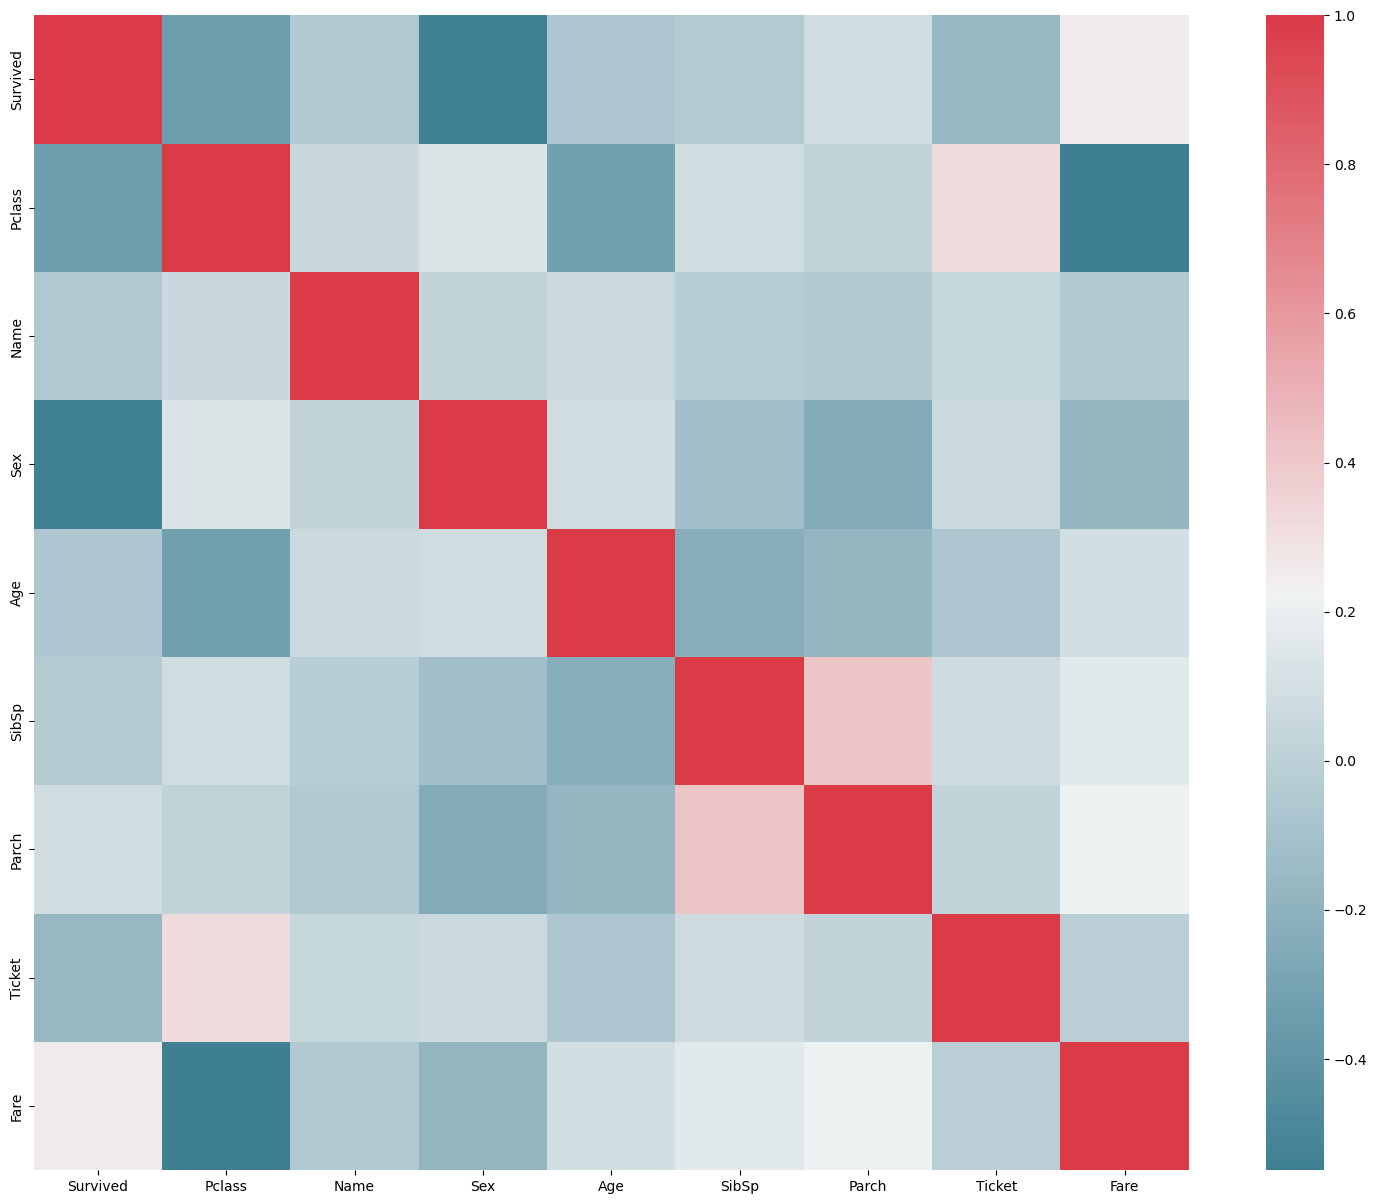

In [114]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [115]:
cor['Survived'].sort_values(ascending=False)#there is little to no correlation between survival and other features.We dont have a multicollinearity issue

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Name       -0.057343
Age        -0.069809
Ticket     -0.164549
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [116]:
# dividing the dataset into dependent and independent variables

x=df.drop("Survived",axis = 1)
y=df["Survived"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (891, 8)
Label Dimension= (891,)


In [117]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.827377,-1.310217,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445
1,-1.566107,-0.991410,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845
2,0.827377,-0.357685,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854
3,-1.566107,-0.672604,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730
4,0.827377,-1.671790,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337
...,...,...,...,...,...,...,...,...
886,-0.369365,0.400452,0.737695,-0.207709,-0.474545,-0.473674,-1.183277,-0.386671
887,-1.566107,-0.552079,-1.355574,-0.823344,-0.474545,-0.473674,-1.616678,-0.044381
888,0.827377,-0.124412,-1.355574,0.000000,0.432793,2.008933,1.676173,-0.176263
889,-1.566107,-1.415189,0.737695,-0.284663,-0.474545,-0.473674,-1.646568,-0.044381


In [118]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8843283582089553 at random_state 4


In [119]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [120]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [121]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8582089552238806
[[166  12]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       178
           1       0.84      0.71      0.77        90

    accuracy                           0.86       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.86      0.86      0.85       268



In [122]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8246268656716418
[[157  21]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       178
           1       0.75      0.71      0.73        90

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [123]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8582089552238806
[[167  11]
 [ 27  63]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       178
           1       0.85      0.70      0.77        90

    accuracy                           0.86       268
   macro avg       0.86      0.82      0.83       268
weighted avg       0.86      0.86      0.85       268



In [124]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8731343283582089
[[165  13]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       178
           1       0.84      0.77      0.80        90

    accuracy                           0.87       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.87      0.87      0.87       268



In [125]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8171641791044776
[[153  25]
 [ 24  66]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       178
           1       0.73      0.73      0.73        90

    accuracy                           0.82       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [126]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.835820895522388
[[162  16]
 [ 28  62]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       178
           1       0.79      0.69      0.74        90

    accuracy                           0.84       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.84      0.83       268



In [127]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8470149253731343
[[161  17]
 [ 24  66]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       178
           1       0.80      0.73      0.76        90

    accuracy                           0.85       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268



In [128]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [129]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.79329609 0.80898876 0.85393258 0.8258427  0.85955056]
0.8283221392254095
Difference between Accuracy score and cross validation score is - 0.029886815998471095


In [130]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.79329609 0.78089888 0.79775281 0.76966292 0.83146067]
0.7946142740568701
Difference between Accuracy score and cross validation score is - 0.030012591614771655


In [131]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.82681564 0.8258427  0.80898876 0.80337079 0.84831461]
0.822666499278137
Difference between Accuracy score and cross validation score is - 0.03554245594574368


In [132]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.79888268 0.8258427  0.85955056 0.80337079 0.84269663]
0.8260686711443098
Difference between Accuracy score and cross validation score is - 0.047065657213899104


In [133]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.81005587 0.80337079 0.8258427  0.79775281 0.84269663]
0.8159437574540205
Difference between Accuracy score and cross validation score is - 0.0012204216504571042


In [134]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.7877095  0.81460674 0.83146067 0.80898876 0.86516854]
0.8215868432615654
Difference between Accuracy score and cross validation score is - 0.014234052260822638


In [135]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.81005587 0.78089888 0.87078652 0.79775281 0.83146067]
0.8181909484652564
Difference between Accuracy score and cross validation score is - 0.028823976907877857


In [ ]:
#Model Selection
#AdaBoost Classifier is the best model with the least difference between accuracy and cross validation score